## Data Preparation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import scipy.io
from scipy.special import softmax
from sklearn.svm import SVC
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:

ath = r"..."
os.chdir(path)

In [3]:
X = pd.read_csv("MRI_processed_ctx_240227_final.csv") # AV45
Y = pd.read_csv("tau_processed_ctx_240227_final.csv") # AV1451
demogra = pd.read_csv("label_processed_ctx_240227_final.csv")
# X.drop(X.columns[0], axis=1, inplace=True)
# Y.drop(Y.columns[0], axis=1, inplace=True)

In [4]:
label = np.array(demogra['DXCURREN']).reshape(-1,1)

In [5]:
X = X.select_dtypes([np.number]) # 375 by 72
X.drop('RID', axis=1, inplace=True)
X

,RightParacentral,RightParahippocampal,RightParsOpercularis,RightParsOrbitalis,RightParsTriangularis,RightPericalcarine,RightPostcentral,RightPosteriorCingulate,RightPrecentral,RightPrecuneus,...,RightFrontalPole,RightFusiform,RightInferiorParietal,RightInferiorTemporal,RightIsthmusCingulate,RightLateralOccipital,RightLateralOrbitofrontal,RightLingual,RightMedialOrbitofrontal,RightMiddleTemporal
0,2.110,2.738,2.548,3.094,2.332,1.608,1.860,2.505,2.308,2.307,...,2.765,2.840,2.562,3.083,2.339,2.239,2.786,1.855,2.630,2.883
1,2.210,2.920,2.512,2.937,2.388,1.541,1.792,2.951,2.400,2.423,...,3.327,3.122,2.529,3.136,2.736,2.310,2.957,2.113,2.878,2.968
2,1.941,2.734,2.499,2.404,2.186,1.321,1.628,2.399,2.222,2.043,...,2.492,2.525,2.183,2.699,2.288,2.017,2.551,1.838,2.450,2.722
3,2.256,2.297,2.387,2.250,2.193,1.596,1.926,2.136,2.251,2.197,...,2.434,2.658,2.313,2.609,2.266,2.216,2.308,1.994,2.369,2.675
4,2.220,2.933,2.568,3.035,2.714,1.600,1.910,2.358,2.207,2.393,...,3.289,3.047,2.437,2.985,2.358,2.236,2.873,2.170,2.673,2.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2.191,2.972,2.277,2.375,2.053,1.653,1.702,2.414,2.393,2.246,...,2.399,2.916,2.221,3.084,2.389,2.081,2.598,2.121,2.333,2.792
371,2.540,2.591,2.764,3.015,2.698,1.923,2.095,2.453,2.620,2.468,...,3.112,3.080,2.635,3.156,2.729,2.391,2.916,2.134,2.652,3.092
372,2.571,2.260,2.476,2.792,2.563,1.638,1.975,2.655,2.398,2.541,...,2.493,2.956,2.703,2.987,2.482,2.211,2.898,2.092,2.497,3.089
373,2.185,2.682,2.147,2.382,2.247,1.522,1.773,2.308,2.128,2.136,...,2.535,2.697,2.141,2.631,2.054,2.043,2.394,1.926,2.368,2.694


In [6]:
Y = Y.select_dtypes([np.number]) # 375 by 72
Y.drop('RID', axis=1, inplace=True)
Y

,CTX_LH_BANKSSTS_SUVR,CTX_LH_CAUDALANTERIORCINGULATE_SUVR,CTX_LH_CAUDALMIDDLEFRONTAL_SUVR,CTX_LH_CUNEUS_SUVR,CTX_LH_ENTORHINAL_SUVR,CTX_LH_FRONTALPOLE_SUVR,CTX_LH_FUSIFORM_SUVR,CTX_LH_INFERIORPARIETAL_SUVR,CTX_LH_INFERIORTEMPORAL_SUVR,CTX_LH_INSULA_SUVR,...,CTX_RH_PRECENTRAL_SUVR,CTX_RH_PRECUNEUS_SUVR,CTX_RH_ROSTRALANTERIORCINGULATE_SUVR,CTX_RH_ROSTRALMIDDLEFRONTAL_SUVR,CTX_RH_SUPERIORFRONTAL_SUVR,CTX_RH_SUPERIORPARIETAL_SUVR,CTX_RH_SUPERIORTEMPORAL_SUVR,CTX_RH_SUPRAMARGINAL_SUVR,CTX_RH_TEMPORALPOLE_SUVR,CTX_RH_TRANSVERSETEMPORAL_SUVR
0,1.360,1.158,1.313,1.267,1.830,1.420,1.372,1.401,1.487,1.245,...,1.234,1.306,1.140,1.392,1.323,1.326,1.313,1.309,1.232,1.075
1,1.328,1.093,1.278,1.227,1.622,1.359,1.324,1.331,1.442,1.137,...,1.086,1.319,1.039,1.209,1.207,1.186,1.263,1.270,1.089,0.886
2,1.490,1.093,1.401,1.306,1.625,1.254,1.553,1.521,1.592,1.294,...,1.256,1.350,1.211,1.300,1.340,1.422,1.401,1.360,1.530,1.092
3,1.231,0.845,1.187,0.966,1.207,1.375,1.149,1.261,1.303,1.084,...,1.065,1.051,0.902,1.153,1.168,1.166,1.077,1.168,1.093,0.894
4,1.472,0.855,1.181,0.939,1.292,1.156,1.318,1.308,1.565,1.165,...,1.105,1.189,1.001,1.233,1.128,1.148,1.265,1.265,1.090,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.963,0.935,1.043,1.022,1.049,1.154,1.100,1.044,1.213,1.003,...,0.924,1.003,0.878,1.076,1.005,1.024,1.082,1.059,0.951,0.898
371,1.251,1.120,1.270,1.096,1.163,1.525,1.275,1.254,1.368,1.282,...,1.155,1.214,1.063,1.408,1.262,1.134,1.221,1.311,1.268,0.871
372,0.961,0.854,0.944,0.732,1.026,1.210,1.096,1.014,1.127,0.940,...,0.878,0.912,0.944,0.981,1.022,0.889,0.991,0.966,0.978,0.725
373,1.031,1.016,1.166,1.001,1.255,1.329,1.140,1.377,1.276,1.110,...,1.057,1.103,1.003,1.125,1.052,1.106,1.090,1.133,1.051,0.903


In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
group_by_sex = demogra.groupby('PTGENDER')
group_indices = group_by_sex.groups
index_female = np.array(group_indices[2.0])
index_male = np.array(group_indices[1.0])

In [9]:
z = np.array(demogra['PTGENDER']).reshape(-1,1)

In [10]:
# X = np.concatenate((X, z), axis=1)
# Y = np.concatenate((Y, z), axis=1)

## Algorithm for FRCCA

In [12]:
import numpy as np
from sklearn.cross_decomposition import CCA

class FairCCA:
    def __init__(self, R, scale=True, max_iter=int(1e4), tol=1e-10):
        self.R = R
        self.scale = scale
        self.max_iter = max_iter
        self.tol = tol
        self.R_x = None
        self.R_y = None
        self.cca = CCA(n_components=R, scale=scale, max_iter=max_iter, tol=tol)
        
    def fit(self, X, Y, z):
        X = (X - X.mean(axis=0)) / X.std(axis=0)
        Y = (Y - Y.mean(axis=0)) / Y.std(axis=0)
        z = (z - z.mean()) / z.std()
        z = z.reshape(-1, 1)
        
        zX = z.T @ X
        _, _, Vt_x = np.linalg.svd(zX)
        self.R_x = Vt_x[:, 1:]
        
        zY = z.T @ Y
        _, _, Vt_y = np.linalg.svd(zY)
        self.R_y = Vt_y[:, 1:]
        
        X_new = X @ self.R_x
        Y_new = Y @ self.R_y
        
        self.cca.fit(X_new, Y_new)
        
    def transform(self, X, Y):
        X_new = (X - X.mean(axis=0)) / X.std(axis=0)
        Y_new = (Y - Y.mean(axis=0)) / Y.std(axis=0)
        X_transformed = X_new @ self.R_x
        Y_transformed = Y_new @ self.R_y
        X_c, Y_c = self.cca.transform(X_transformed, Y_transformed)
        X_c = X_c / (np.sqrt(np.sum(X_c**2, axis=0)))
        Y_c = Y_c / (np.sqrt(np.sum(Y_c**2, axis=0)))
        return X_c, Y_c
    
    def fit_transform(self, X, Y, z):
        self.fit(X, Y, z)
        return self.transform(X, Y)


In [13]:
import time

In [14]:
times_FR = []
for i in range(10):
    time1 = time.time()
    fair_cca_time = FairCCA(R=5)
    X_proj, Y_proj = fair_cca_time.fit_transform(X, Y, z)
    time2 = time.time()
    times = time2-time1
    times_FR.append(times)
np.mean(times_FR), np.std(times_FR)

(0.5156278371810913, 0.007606692708868106)

## Baseline: Traditional CCA

In [15]:
corr_traditional_CCA_dim = []
fairness_traditional_CCA_dimX = []
fairness_traditional_CCA_dimY = []
for i in range(1, 5):
    cca = CCA(n_components=i)
    cca.fit(X,Y)
    X_c, Y_c = cca.transform(X, Y)
    X_c = X_c / (np.sqrt(np.sum(X_c**2, axis=0)))
    Y_c = Y_c / (np.sqrt(np.sum(Y_c**2, axis=0)))
    cov_trad_CCA = X_c.T@Y_c
    corr_trad_CCA = np.trace(cov_trad_CCA)
    corr_traditional_CCA_dim.append(corr_trad_CCA)
    fairness_traditional_CCAX = np.sum(np.abs(np.log(np.abs(z.T@X_c))))
    fairness_traditional_CCA_dimX.append(fairness_traditional_CCAX)
    fairness_traditional_CCAY = np.sum(np.abs(np.log(np.abs(z.T@Y_c))))
    fairness_traditional_CCA_dimY.append(fairness_traditional_CCAY)


corr_traditional_CCA_dim = np.array(corr_traditional_CCA_dim)
fairness_traditional_CCA_dimX = np.array(fairness_traditional_CCA_dimX)
fairness_traditional_CCA_dimY = np.array(fairness_traditional_CCA_dimY)
corr_traditional_CCA_dim, fairness_traditional_CCA_dimX, fairness_traditional_CCA_dimY

(array([0.82608671, 1.64561185, 2.43667263, 3.1898082 ]),
 array([0.25893351, 3.54905151, 4.81257756, 6.12420675]),
 array([0.41003053, 1.2145372 , 3.71934585, 4.15621205]))

In [16]:
times_trad = []
for i in range(10):
    time1 = time.time()
    cca2 = CCA(n_components=5)
    cca2.fit(X,Y)
    X_c, Y_c = cca.transform(X, Y)
    time2 = time.time()
    times = time2-time1
    times_trad.append(times)
np.mean(times_trad), np.std(times_trad)

(0.3054158926010132, 0.007748684772251994)

## Fairness and Correlation for FRCCA

### Data collection

In [17]:
corr_FRCCA_dim = []
fairness_FRCCA_dimX = []
fairness_FRCCA_dimY = []
for i in range(1, 5):
    fair_cca = FairCCA(R=i)
    X_proj, Y_proj = fair_cca.fit_transform(X, Y, z)
    cov_FRCCA = X_proj.T@Y_proj
    corr_FRCCA = np.trace(cov_FRCCA)
    corr_FRCCA_dim.append(corr_FRCCA)
    fairness_FRCCAX= np.sum(np.abs(np.log(np.abs(z.T@X_proj))))
    fairness_FRCCA_dimX.append(fairness_FRCCAX)
    fairness_FRCCAY= np.sum(np.abs(np.log(np.abs(z.T@Y_proj))))
    fairness_FRCCA_dimY.append(fairness_FRCCAY)

corr_FRCCA_dim = np.array(corr_FRCCA_dim)
fairness_FRCCA_dimX= np.array(fairness_FRCCA_dimX)
fairness_FRCCA_dimY = np.array(fairness_FRCCA_dimY)
corr_FRCCA_dim, fairness_FRCCA_dimX, fairness_FRCCA_dimY

(array([0.82267401, 1.64060001, 2.43112397, 3.18321988]),
 array([ 34.3053826 ,  67.8015136 , 104.79379796, 136.38830592]),
 array([ 32.48474026,  66.35780643, 100.64074486, 138.50767797]))

### Plots

In [ ]:
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='Times New Roman', weight='normal')
dimensions = np.array([1, 2, 3, 4])
corr_change = (corr_FRCCA_dim - corr_traditional_CCA_dim) / corr_traditional_CCA_dim 
fairnessX = (fairness_FRCCA_dimX - fairness_traditional_CCA_dimX) / fairness_traditional_CCA_dimX
fairnessY = (fairness_FRCCA_dimY - fairness_traditional_CCA_dimY) / fairness_traditional_CCA_dimY
fairness = (fairnessX + fairnessY) / 2
fig, ax = plt.subplots(figsize = (8,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18)   
fairness_bars = ax.bar(dimensions, fairness, width=0.4, color='#ff9549', label='Fairness')


correlation_bars = ax.bar(dimensions + 0.4, corr_change * 5000, width=0.4, color='lightblue', label='Correlation')

for bar in fairness_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom',fontsize=24)

for bar in correlation_bars:
    yval = bar.get_height()
    yval_2 = yval / 5000
    if yval <= 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval , f"{yval_2:.3f}", ha='center', va='top',fontsize=24)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval , f"{yval_2:.3f}", ha='center', va='bottom',fontsize=24)
ax.set_ylim(-25, 120)        
ticks = np.array(ax.get_yticks())

ticks_to_change = ticks == -20

ticks[ticks_to_change] = -0.004

ax.set_yticklabels(ticks)
plt.grid(False)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5, color='grey')
ax.set_xlabel('Dimension', fontsize=24, fontweight='bold')
ax.set_ylabel('Percentage Change', fontsize=24, fontweight='bold')
#ax.set_title('Fairness and Correlation by Dimension', fontsize = 18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3, fontsize=14)
#ax.legend(fontsize = 18, fancybox=True)

plt.show()


## Fairness and Correlation for SFCCA

### Data Collection

In [19]:
corr_SFCCA_dim = []
fairness_SFCCA_dimX = []
fairness_SFCCA_dimY = []
for i in range(1, 5):
    address = r"..."
    mat = scipy.io.loadmat(address)
    U = mat[f'V{i}_av14_mri']
    V = mat[f'U{i}_av14_mri']
    X_proj = X@U
    Y_proj = Y@V
    X_proj = X_proj / (np.sqrt(np.sum(X_proj**2, axis=0)))
    Y_proj = Y_proj / (np.sqrt(np.sum(Y_proj**2, axis=0)))
    cov_SFCCA = X_proj.T@Y_proj
    corr_SFCCA = np.trace(cov_SFCCA)
    corr_SFCCA_dim.append(corr_SFCCA)
    fairness_SFCCAX= np.sum(np.abs(np.log(np.abs(z.T@X_proj))))
    fairness_SFCCA_dimX.append(fairness_SFCCAX)
    fairness_SFCCAY= np.sum(np.abs(np.log(np.abs(z.T@Y_proj))))
    fairness_SFCCA_dimY.append(fairness_SFCCAY)

corr_SFCCA_dim = np.abs(np.array(corr_SFCCA_dim))
fairness_SFCCA_dimX= np.array(fairness_SFCCA_dimX)
fairness_SFCCA_dimY = np.array(fairness_SFCCA_dimY)
corr_SFCCA_dim, fairness_SFCCA_dimX, fairness_SFCCA_dimY

(array([0.92060677, 1.50478184, 0.90023581, 1.67577972]),
 array([ 3.37922747,  6.67820781,  8.15246161, 11.81441224]),
 array([ 3.31485192,  6.40639544,  9.55192878, 12.83782653]))

### Plots

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.rc('font', family='Times New Roman', weight='normal')
dimensions = np.array([1, 2, 3, 4])
corr_change = (corr_FRCCA_dim - corr_SFCCA_dim) / corr_SFCCA_dim 
fairnessX = (fairness_FRCCA_dimX - fairness_SFCCA_dimX) / fairness_SFCCA_dimX
fairnessY = (fairness_FRCCA_dimY - fairness_SFCCA_dimY) / fairness_SFCCA_dimY
fairness = (fairnessX + fairnessY) / 2
fig, ax = plt.subplots(figsize = (8,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18)  
# for label in ax.get_xticklabels():
#     label.set_weight('bold')  
# for label in ax.get_yticklabels():
#     label.set_weight('bold')  
fairness_bars = ax.bar(dimensions, fairness, width=0.4, color='#ff9549', label='Fairness')


correlation_bars = ax.bar(dimensions + 0.4, corr_change, width=0.4, color='lightblue', label='Correlation')


for bar in fairness_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom',fontsize=24)

for bar in correlation_bars:
    yval = bar.get_height()
    yval_2 = yval
    if yval <= 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval , f"{yval_2:.3f}", ha='center', va='top', fontsize=24)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval , f"{yval_2:.3f}", ha='center', va='bottom',fontsize=24)
ax.set_ylim(-1, 11)        
ticks = np.array(ax.get_yticks())

ticks_to_change = ticks == -20

ticks[ticks_to_change] = -0.04

ax.set_yticklabels(ticks)
plt.grid(False)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5, color='grey')
ax.set_xlabel('Dimension', fontsize=24, fontweight='bold')
ax.set_ylabel('Percentage Change',fontsize=24, fontweight='bold')
#ax.set_title('Fairness and Correlation by Dimension', fontsize = 18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3, fontsize=14)
#ax.legend(fontsize = 18, fancybox=True)

plt.show()


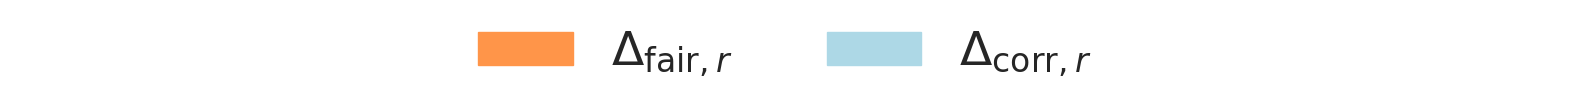

In [130]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
from matplotlib import rc
rc('text', usetex=False)
font_prop = FontProperties(family='Times New Roman', style='normal')
plt.rc('font', family='Times New Roman', weight='normal')
patch1 = patches.Patch(color='#ff9549', label=r'$\Delta_{\mathrm{fair},r}$')
patch2 = patches.Patch(color='lightblue', label=r'$\Delta_{\mathrm{corr},r}$')
plt.figure(figsize=(20, 0.1))
plt.axis('off')
plt.legend(handles=[patch1, patch2], loc='center', ncol=2, frameon=False, fontsize=34)

plt.show()

## Fairness and Correlation for MFCCA

### Data Collection

In [22]:
corr_MFCCA_dim = []
fairness_MFCCA_dimX = []
fairness_MFCCA_dimY = []
for i in range(1, 5):
    address = r"..."
    mat = scipy.io.loadmat(address)
    U = mat[f'V{i}_av14_mri']
    V = mat[f'U{i}_av14_mri']
    X_proj = X@U
    Y_proj = Y@V
    X_proj = X_proj / (np.sqrt(np.sum(X_proj**2, axis=0)))
    Y_proj = Y_proj / (np.sqrt(np.sum(Y_proj**2, axis=0)))
    cov_MFCCA = X_proj.T@Y_proj
    corr_MFCCA = np.trace(cov_MFCCA)
    corr_MFCCA_dim.append(corr_MFCCA)
    fairness_MFCCAX= np.sum(np.abs(np.log(np.abs(z.T@X_proj))))
    fairness_MFCCA_dimX.append(fairness_MFCCAX)
    fairness_MFCCAY= np.sum(np.abs(np.log(np.abs(z.T@Y_proj))))
    fairness_MFCCA_dimY.append(fairness_MFCCAY)

corr_MFCCA_dim = np.abs(np.array(corr_MFCCA_dim))
fairness_MFCCA_dimX= np.array(fairness_MFCCA_dimX)
fairness_MFCCA_dimY = np.array(fairness_MFCCA_dimY)
corr_MFCCA_dim, fairness_MFCCA_dimX, fairness_MFCCA_dimY

(array([0.77274597, 1.34465543, 0.59100515, 1.47289229]),
 array([ 3.37773118,  6.64833848,  8.84068678, 12.00818803]),
 array([ 3.16853468,  6.24940235,  9.32096415, 12.5709518 ]))

### Plot

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.rc('font', family='Times New Roman', weight='normal')
dimensions = np.array([1, 2, 3, 4])
corr_change = (corr_FRCCA_dim - corr_MFCCA_dim) / corr_MFCCA_dim 
fairnessX = (fairness_FRCCA_dimX - fairness_MFCCA_dimX) / fairness_MFCCA_dimX
fairnessY = (fairness_FRCCA_dimY - fairness_MFCCA_dimY) / fairness_MFCCA_dimY
fairness = (fairnessX + fairnessY) / 2
fig, ax = plt.subplots(figsize = (8,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18)  
fairness_bars = ax.bar(dimensions, fairness, width=0.4, color='#ff9549', label='Fairness')


correlation_bars = ax.bar(dimensions + 0.4, corr_change, width=0.4, color='lightblue', label='Correlation')


for bar in fairness_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=24)

for bar in correlation_bars:
    yval = bar.get_height()
    yval_2 = yval
    if yval <= 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval , f"{yval_2:.3f}", ha='center', va='top', fontsize=24)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval , f"{yval_2:.3f}", ha='center', va='bottom', fontsize=24)
ax.set_ylim(-1, 11)        
ticks = np.array(ax.get_yticks())

ticks_to_change = ticks == -20

ticks[ticks_to_change] = -0.04

ax.set_yticklabels(ticks)
plt.grid(False)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5, color='grey')
ax.set_xlabel('Dimension', fontsize=24, fontweight='bold')
ax.set_ylabel('Percentage Change',fontsize=24, fontweight='bold')
#ax.set_title('Fairness and Correlation by Dimension', fontsize = 18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3, fontsize=14)
# ax.legend(fontsize = 18, fancybox=True)

plt.show()


# Downstream Task (Classification)

## Classifier Parameter Setup

In [24]:
param_grid1 = {
    'C': [50],
    'gamma': ['auto'],
    'kernel': ['rbf']
}# Select Linear/Non-Linear Here

## Classification for FRCCA processed data

In [25]:
seeds = [42, 43, 44, 45, 46]
idx_train_all = []
idx_test_all = []
accuracy_FR = []
all_y_pred_FR = []
sensitive = []
all_y_test_FR = []
all_X_train = []
all_X_test = []
all_y_train = []
all_y_test = []
best_params = []
all_y_pred_prob_FR = []

In [26]:
for seed in seeds:
    label = label.ravel()
    indices = np.arange(X.shape[0])
    'Split the two modalities X, Y into Training set and Testing set'
    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, label,
                                                                            indices, test_size=0.3,
                                                                            random_state=seed, stratify=label)
    Y_train, Y_test = Y[idx_train], Y[idx_test]
    z_train, z_test = z[idx_train], z[idx_test]
    
    
    all_X_train.append(X_train.tolist())
    all_X_test.append(X_test.tolist())
    all_y_train.append(y_train.tolist())
    all_y_test.append(y_test.tolist())
    
    'FRCCA on X_train/Y_train, and get the weights U/V'
    "X_train := Training Dataset of Modality X utilized in the classification by FRCCA,"
    "Y_train := Training Dataset of Modality Y utilized in the classification by FRCCA"
    fair_cca = FairCCA(R=2)
    fair_cca.fit(X_train, Y_train, z_train)
    X_train, Y_train = fair_cca.transform(X_train, Y_train)
    X_test, Y_test = fair_cca.transform(X_test, Y_test)
    'Store the index of the Training and Testing samples for further usage'
    idx_train_all.append(idx_train.tolist())
    idx_test_all.append(idx_test.tolist())
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    svc1 = SVC(random_state=seed, probability=True)
    clf1 = GridSearchCV(svc1, param_grid1, n_jobs=None)
    clf1.fit(X_train, y_train)
    y_pred_FR = clf1.predict(X_test)
    all_y_pred_FR.append(y_pred_FR.tolist())
    all_y_test_FR.append(y_test.tolist())
    accuracy = accuracy_score(y_test, y_pred_FR)
    accuracy_FR.append(accuracy)
    sensitive.append(z[idx_test])
    best_param = clf1.best_params_
    best_params.append(best_param)
    y_pred_prob_FR = clf1.predict_proba(X_test)
    all_y_pred_prob_FR.append(y_pred_prob_FR.tolist())
accuracy_FR = np.array(accuracy_FR)
all_y_pred_prob_FR = np.array(all_y_pred_prob_FR)
all_y_pred_FR = np.array(all_y_pred_FR)
all_y_test_FR = np.array(all_y_test_FR)
all_X_train = np.array(all_X_train)
all_X_test = np.array(all_X_test)
all_y_train = np.array(all_y_train)
all_y_test = np.array(all_y_test)


In [27]:
best_params

[{'C': 50, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}]

## Classification for Traditional CCA processed data

In [28]:
accuracy_trad = []
all_y_pred_trad = []
all_y_test_trad = []
all_y_train_trad = []
all_X_train_trad = []
all_X_test_trad = []
all_y_pred_prob_trad = []

In [ ]:
for i in range(len(seeds)):
    X_train, Y_train = X[idx_train_all[i]], Y[idx_train_all[i]]
    X_test, Y_test = X[idx_test_all[i]], Y[idx_test_all[i]]
    cca1 = CCA(n_components=2)
    cca1.fit(X_train, Y_train)
    X_train, Y_train = cca1.transform(X_train, Y_train)
    X_train = X_train / (np.sqrt(np.sum(X_train**2, axis=0)))
    Y_train = Y_train / (np.sqrt(np.sum(Y_train**2, axis=0)))
    X_test, Y_test = cca1.transform(X_test, Y_test)
    X_test = X_test / (np.sqrt(np.sum(X_test**2, axis=0)))
    Y_test = Y_test / (np.sqrt(np.sum(Y_test**2, axis=0)))
    seed = seeds[i]
    X_train_trad, y_train_trad = X_train, label[idx_train_all[i]].ravel()
    idx_train = idx_train_all[i]
    idx_test = idx_test_all[i]
    X_test_trad = X_test
    y_test_trad = label[idx_test].ravel()

    scaler = StandardScaler()
    X_train_trad = scaler.fit_transform(X_train_trad)
    X_test_trad = scaler.transform(X_test_trad)
    svc2 = SVC(random_state=seed, probability=True)
    clf2 = GridSearchCV(svc2, param_grid1, n_jobs=None)
    clf2.fit(X_train_trad, y_train_trad)

    y_pred_trad = clf2.predict(X_test_trad)
    all_y_pred_trad.append(y_pred_trad.tolist())
    all_y_train_trad.append(y_train_trad.tolist())
    all_y_test_trad.append(y_test_trad.tolist())
    all_X_train_trad.append(X_train_trad.tolist())
    all_X_test_trad.append(X_test_trad.tolist())
    accuracy = accuracy_score(y_test_trad, y_pred_trad)
    accuracy_trad.append(accuracy)
    y_pred_prob_trad = clf2.predict_proba(X_test_trad)
    all_y_pred_prob_trad.append(y_pred_prob_trad.tolist())
accuracy_trad = np.array(accuracy_trad)
all_y_pred_trad = np.array(all_y_pred_trad)
all_y_train_trad = np.array(all_y_train_trad)
all_y_test_trad = np.array(all_y_test_trad)
all_X_train_trad = np.array(all_X_train_trad)
all_X_test_trad = np.array(all_X_test_trad)
all_y_pred_prob_trad = np.array(all_y_pred_prob_trad)

In [30]:
sensitive = np.array(sensitive)
sensitive.shape

(5, 113, 1)

## Classification for SFCCA

In [31]:
all_X_SFCCA = []
all_Y_SFCCA = []
for i in range(0,len(seeds)):
    address = fr"..."
    mat = scipy.io.loadmat(address)
    if i == 0:
        U = mat['V1_SF']    
        V = mat['U1_SF']
    else:
        U = mat['V_SF']
        V = mat['U_SF']
    X_SFCCA = X@U
    Y_SFCCA = Y@V
    all_X_SFCCA.append(X_SFCCA.tolist())
    all_Y_SFCCA.append(Y_SFCCA.tolist())
all_X_SFCCA = np.array(all_X_SFCCA)
all_Y_SFCCA = np.array(all_Y_SFCCA)

In [32]:
accuracy_SFCCA = []
all_y_pred_SFCCA = []
all_y_test_SFCCA = []
all_y_train_SFCCA = []
all_X_train_SFCCA = []
all_X_test_SFCCA = []
all_y_pred_prob_SFCCA = []

In [33]:
for i in range(len(seeds)):
    seed = seeds[i]
    idx_train = idx_train_all[i]
    idx_test = idx_test_all[i]
    
    X_train_SFCCA = all_X_SFCCA[i][idx_train]
    X_test_SFCCA = all_X_SFCCA[i][idx_test]
    y_train_SFCCA = label[idx_train].ravel()
    y_test_SFCCA = label[idx_test].ravel()

    scaler = StandardScaler()
    X_train_SFCCA = scaler.fit_transform(X_train_SFCCA)
    X_test_SFCCA = scaler.transform(X_test_SFCCA)
    svc5 = SVC(random_state=seed, probability=True)
    clf5 = GridSearchCV(svc5, param_grid1, n_jobs=None)
    clf5.fit(X_train_SFCCA, y_train_SFCCA)

    y_pred_SFCCA = clf5.predict(X_test_SFCCA)
    all_y_pred_SFCCA.append(y_pred_SFCCA.tolist())
    all_y_train_SFCCA.append(y_train_SFCCA.tolist())
    all_y_test_SFCCA.append(y_test_SFCCA.tolist())
    all_X_train_SFCCA.append(X_train_SFCCA.tolist())
    all_X_test_SFCCA.append(X_test_SFCCA.tolist())
    accuracy = accuracy_score(y_test_SFCCA, y_pred_SFCCA)
    accuracy_SFCCA.append(accuracy)
    y_pred_prob_SFCCA = clf5.predict_proba(X_test_SFCCA)
    all_y_pred_prob_SFCCA.append(y_pred_prob_SFCCA.tolist())
accuracy_SFCCA = np.array(accuracy_SFCCA)
all_y_pred_SFCCA = np.array(all_y_pred_SFCCA)
all_y_train_SFCCA = np.array(all_y_train_SFCCA)
all_y_test_SFCCA = np.array(all_y_test_SFCCA)
all_X_train_SFCCA = np.array(all_X_train_SFCCA)
all_X_test_SFCCA = np.array(all_X_test_SFCCA)
all_y_pred_prob_SFCCA = np.array(all_y_pred_prob_SFCCA)

## Classification for MFCCA

In [34]:
all_X_MFCCA = []
all_Y_MFCCA = []
for i in range(0,len(seeds)):
    address = fr"..."
    mat = scipy.io.loadmat(address)
    if i == 0:
        U = mat['V1_MF']    
        V = mat['U1_MF']
    else:
        U = mat['V_MF']
        V = mat['U_MF']
    X_MFCCA = X@U
    Y_MFCCA = Y@V
    all_X_MFCCA.append(X_MFCCA.tolist())
    all_Y_MFCCA.append(Y_MFCCA.tolist())
all_X_MFCCA = np.array(all_X_MFCCA)
all_Y_MFCCA = np.array(all_Y_MFCCA)

In [35]:
accuracy_MFCCA = []
all_y_pred_MFCCA = []
all_y_test_MFCCA = []
all_y_train_MFCCA = []
all_X_train_MFCCA = []
all_X_test_MFCCA = []
all_y_pred_prob_MFCCA = []

In [36]:
for i in range(len(seeds)):
    seed = seeds[i]
    idx_train = idx_train_all[i]
    idx_test = idx_test_all[i]
    X_train_MFCCA = all_X_MFCCA[i][idx_train]
    X_test_MFCCA = all_X_MFCCA[i][idx_test]
    y_train_MFCCA = label[idx_train].ravel()
    y_test_MFCCA = label[idx_test].ravel()

    scaler = StandardScaler()
    X_train_MFCCA = scaler.fit_transform(X_train_MFCCA)
    X_test_MFCCA = scaler.transform(X_test_MFCCA)

    svc6 = SVC(random_state=seed, probability=True)
    clf6 = GridSearchCV(svc6, param_grid1, n_jobs=None)
    clf6.fit(X_train_MFCCA, y_train_MFCCA)

    y_pred_MFCCA = clf6.predict(X_test_MFCCA)
    all_y_pred_MFCCA.append(y_pred_MFCCA.tolist())
    all_y_train_MFCCA.append(y_train_MFCCA.tolist())
    all_y_test_MFCCA.append(y_test_MFCCA.tolist())
    all_X_train_MFCCA.append(X_train_MFCCA.tolist())
    all_X_test_MFCCA.append(X_test_MFCCA.tolist())
    accuracy = accuracy_score(y_test_MFCCA, y_pred_MFCCA)
    accuracy_MFCCA.append(accuracy)
    y_pred_prob_MFCCA = clf6.predict_proba(X_test_MFCCA)
    all_y_pred_prob_MFCCA.append(y_pred_prob_MFCCA.tolist())
accuracy_MFCCA = np.array(accuracy_MFCCA)
all_y_pred_MFCCA = np.array(all_y_pred_MFCCA)
all_y_train_MFCCA = np.array(all_y_train_MFCCA)
all_y_test_MFCCA = np.array(all_y_test_MFCCA)
all_X_train_MFCCA = np.array(all_X_train_MFCCA)
all_X_test_MFCCA = np.array(all_X_test_MFCCA)
all_y_pred_prob_MFCCA = np.array(all_y_pred_prob_MFCCA)

In [37]:
accuracy_svm = []
all_y_pred_svm = []
all_y_test_svm = []
all_y_train_svm = []
all_X_train_svm = []
all_X_test_svm = []
all_y_pred_prob_svm = []

In [38]:
for i in range(len(seeds)):
    X_train, Y_train = X[idx_train_all[i]], Y[idx_train_all[i]]
    X_test, Y_test = X[idx_test_all[i]], Y[idx_test_all[i]]
    # X_train = X_train / (np.sqrt(np.sum(X_train**2, axis=0)))
    # Y_train = Y_train / (np.sqrt(np.sum(Y_train**2, axis=0)))
    # X_test = X_test / (np.sqrt(np.sum(X_test**2, axis=0)))
    # Y_test = Y_test / (np.sqrt(np.sum(Y_test**2, axis=0)))
    seed = seeds[i]
    X_train_svm, y_train_svm = X_train, label[idx_train_all[i]].ravel()
    idx_train = idx_train_all[i]
    idx_test = idx_test_all[i]
    X_test_svm = X_test
    y_test_svm = label[idx_test].ravel()


    #clf2 = SVC(kernel='rbf', C=2.5, gamma='auto', probability=True)
    svc7 = SVC(random_state=seed, probability=True)
    clf7 = GridSearchCV(svc7, param_grid1, n_jobs=-1)
    clf7.fit(X_train_svm, y_train_svm)

    y_pred_svm = clf7.predict(X_test_svm)
    all_y_pred_svm.append(y_pred_svm.tolist())
    all_y_train_svm.append(y_train_svm.tolist())
    all_y_test_svm.append(y_test_svm.tolist())
    all_X_train_svm.append(X_train_svm.tolist())
    all_X_test_svm.append(X_test_svm.tolist())
    accuracy = accuracy_score(y_test_svm, y_pred_svm)
    accuracy_svm.append(accuracy)
    y_pred_prob_svm = clf7.predict_proba(X_test_svm)
    all_y_pred_prob_svm.append(y_pred_prob_svm.tolist())
    #y_pred_prob_trad = clf2.predict_proba(X_test_trad)
    # print(classification_report(y_test_trad, y_pred_trad))
    # print("Accuracy: ", accuracy_score(y_test_trad, y_pred_trad))
    #print("Indices of Test Set: ", idx_test_trad)
    #print(y_pred_prob_trad)
accuracy_svm = np.array(accuracy_svm)
all_y_pred_svm = np.array(all_y_pred_svm)
all_y_train_svm = np.array(all_y_train_svm)
all_y_test_svm = np.array(all_y_test_svm)
all_X_train_svm = np.array(all_X_train_svm)
all_X_test_svm = np.array(all_X_test_svm)
all_y_pred_prob_svm = np.array(all_y_pred_prob_svm)


# Measure DP and EO (Multi-class Classification)

In [40]:
def demographic_parity_multiclass_prediction_score(y_hat, sensitive_features):
    # get the maximum DP among all the classes
    y_hat = softmax(y_hat)  # normalize
    print(y_hat)
    all_p = np.std(y_hat, axis=0)  # the std prediction for each class
    p_sensible = []
    values_of_sensible_feature = np.unique(sensitive_features)
    for val in values_of_sensible_feature:
        p_sensible.append(y_hat[np.where(sensitive_features == val)[0]].std(axis=0))

    return np.std(np.abs(all_p - p_sensible).mean(axis=0))

In [41]:
def demographic_parity_multiclass_PR(y_hat, sensitive_features, class_idx):
        # measure the difference between the positive rates (TPR+FPR) of different groups
    y_hat = y_hat.ravel()
    values_of_sensible_feature = np.unique(sensitive_features)
    #print(values_of_sensible_feature)
    all_positive = np.sum([1.0 if y_hat[i] == class_idx else 0.0 for i in range(len(y_hat))])
    all_positive_rate = all_positive / len(y_hat)
    female_category = values_of_sensible_feature[0]
    male_category = values_of_sensible_feature[1]
    positive_female = np.sum([1.0 if sensitive_features[i] == female_category and y_hat[i] == class_idx 
                              else 0.0 for i in range(len(y_hat))])
    female_num = np.sum([1.0 if sensitive_features[i] == female_category else 0.0 for i in range(len(y_hat))])
    positive_rate_female = positive_female / female_num
        
        
    positive_male = np.sum([1.0 if sensitive_features[i] == male_category and y_hat[i] == class_idx 
                            else 0.0 for i in range(len(y_hat))])
    male_num = np.sum([1.0 if sensitive_features[i] == male_category else 0.0 for i in range(len(y_hat))])
    positive_rate_male = positive_male / male_num
    
    return np.abs(positive_rate_male - positive_rate_female)
    

## DP for FRCCA

In [42]:
all_DP_FR_pr = []
for j in range(len(seeds)):
    DP_FR_pr = []
    for i in range(1,4): # 3-Classes
        DP_FR_pr.append(demographic_parity_multiclass_PR(all_y_pred_FR[j], sensitive[j], class_idx=i))
    DP_FR_pr = np.mean(DP_FR_pr)
    all_DP_FR_pr.append(DP_FR_pr)
all_DP_FR_pr = np.array(all_DP_FR_pr)
all_DP_FR_pr

array([0.02317177, 0.00020886, 0.00275132, 0.02185792, 0.        ])

## DP for Traditional CCA

In [43]:
all_DP_trad_pr = []
for j in range(len(seeds)):
    DP_trad_pr = []
    for i in range(1,4): # 3-Classes
        DP_trad_pr.append(demographic_parity_multiclass_PR(all_y_pred_trad[j], sensitive[j], class_idx=i))
    DP_trad_pr = np.mean(DP_trad_pr)
    all_DP_trad_pr.append(DP_trad_pr)
all_DP_trad_pr = np.array(all_DP_trad_pr)
all_DP_trad_pr

array([0.08715986, 0.00083542, 0.01291005, 0.02942413, 0.        ])

## DP for SFCCA

In [44]:
all_DP_SFCCA_pr = []
for j in range(len(seeds)):
    DP_SFCCA_pr = []
    for i in range(1,4): # 3-Classes
        DP_SFCCA_pr.append(demographic_parity_multiclass_PR(all_y_pred_SFCCA[j], sensitive[j], class_idx=i))
    DP_SFCCA_pr = np.mean(DP_SFCCA_pr)
    all_DP_SFCCA_pr.append(DP_SFCCA_pr)
all_DP_SFCCA_pr = np.array(all_DP_SFCCA_pr)
all_DP_SFCCA_pr

array([0.0057398 , 0.02506266, 0.01883598, 0.07040773, 0.05764411])

## DP for MFCCA

In [45]:
all_DP_MFCCA_pr = []
for j in range(len(seeds)):
    DP_MFCCA_pr = []
    for i in range(1,4): # 3-Classes
        DP_MFCCA_pr.append(demographic_parity_multiclass_PR(all_y_pred_MFCCA[j], sensitive[j], class_idx=i))
    DP_MFCCA_pr = np.mean(DP_MFCCA_pr)
    all_DP_MFCCA_pr.append(DP_MFCCA_pr)
all_DP_MFCCA_pr = np.array(all_DP_MFCCA_pr)
all_DP_MFCCA_pr

array([0.00063776, 0.03738513, 0.02582011, 0.0432955 , 0.0459482 ])

## DP for SVM

In [46]:
all_DP_svm_pr = []
for j in range(len(seeds)):
    DP_svm_pr = []
    for i in range(1,4): # 3-Classes
        DP_svm_pr.append(demographic_parity_multiclass_PR(all_y_pred_svm[j], sensitive[j], class_idx=i))
    DP_svm_pr = np.mean(DP_svm_pr)
    all_DP_svm_pr.append(DP_svm_pr)
all_DP_svm_pr = np.array(all_DP_svm_pr)
all_DP_svm_pr

array([0.15114796, 0.09064327, 0.03026455, 0.07566204, 0.05659983])

# EO Measurements

In [47]:
def equalized_odds_class_wise(y, y_hat, sensitive_features, class_idx):
    # measure the difference between the true positive rates of different groups
    y_hat = y_hat.ravel()
    y = y.ravel()
    #y_hat = y_hat.argmax(1)
    # print(y_hat)
    # print(y)
    group_true_pos_r = []
    values_of_sensible_feature = np.unique(sensitive_features)
    #print(values_of_sensible_feature)
    true_positive = np.sum([1.0 if y_hat[i] == class_idx and y[i] == class_idx
                             else 0.0 for i in range(len(y_hat))])
    #print(true_positive)
    all_positive = np.sum([1.0 if y[i] == class_idx else 0.0 for i in range(len(y_hat))])
    all_true_pos_r = true_positive / all_positive
    #print(all_true_pos_r)
    for val in values_of_sensible_feature:
        positive_sensitive = np.sum([1.0 if sensitive_features[i] == val and y[i] == class_idx else 0.0
                                     for i in range(len(y_hat))])
        if positive_sensitive > 0:
            true_positive_sensitive = np.sum([1.0 if y_hat[i] == class_idx and
                        sensitive_features[i] == val and y[i] == class_idx
                         else 0.0 for i in range(len(y_hat))])
            eo_tmp = true_positive_sensitive / positive_sensitive  # true positive rate
            group_true_pos_r.append(eo_tmp)

    return np.mean(np.abs(all_true_pos_r - group_true_pos_r))

## EO for FR-CCA

In [48]:
all_EO_FR = []
for j in range(len(seeds)):
    EO_FR = []
    for i in range(1,4): # 3-Classes
        EO_FR.append(equalized_odds_class_wise(all_y_test_FR[j], all_y_pred_FR[j], sensitive_features=sensitive[j], class_idx=i))
    EO_FR = np.mean(EO_FR)
    all_EO_FR.append(EO_FR)
all_EO_FR = np.array(all_EO_FR)

## EO for Traditional CCA

In [49]:
all_EO_trad = []
for j in range(len(seeds)):
    EO_trad = []
    for i in range(1,4): # 3-Classes
        EO_trad.append(equalized_odds_class_wise(all_y_test_trad[j], all_y_pred_trad[j], sensitive_features=sensitive[j], class_idx=i))
    EO_trad = np.mean(EO_trad)
    all_EO_trad.append(EO_trad)
all_EO_trad = np.array(all_EO_trad)


## EO for SFCCA

In [50]:
all_EO_SFCCA = []
for j in range(len(seeds)):
    EO_SFCCA = []
    for i in range(1,4): # 3-Classes
        EO_SFCCA.append(equalized_odds_class_wise(all_y_test_SFCCA[j], all_y_pred_SFCCA[j], sensitive_features=sensitive[j], class_idx=i))
    EO_SFCCA = np.mean(EO_SFCCA)
    all_EO_SFCCA.append(EO_SFCCA)
all_EO_SFCCA = np.array(all_EO_SFCCA)

## EO for MFCCA

In [51]:
all_EO_MFCCA = []
for j in range(len(seeds)):
    EO_MFCCA = []
    for i in range(1,4): # 3-Classes
        EO_MFCCA.append(equalized_odds_class_wise(all_y_test_MFCCA[j], all_y_pred_MFCCA[j], sensitive_features=sensitive[j], class_idx=i))
    EO_MFCCA= np.mean(EO_MFCCA)
    all_EO_MFCCA.append(EO_MFCCA)
all_EO_MFCCA = np.array(all_EO_MFCCA)

## EO for SVM

In [52]:
all_EO_svm = []
for j in range(len(seeds)):
    EO_svm = []
    for i in range(1,4): # 3-Classes
        EO_svm.append(equalized_odds_class_wise(all_y_test_svm[j], all_y_pred_svm[j], sensitive_features=sensitive[j], class_idx=i))
    EO_svm= np.mean(EO_svm)
    all_EO_svm.append(EO_svm)
all_EO_svm = np.array(all_EO_svm)

# Group Sufficiency Measurement

In [53]:
import copy
from sklearn.calibration import calibration_curve
from scipy import interpolate
import logging
logger = logging.getLogger("fair")

In [54]:
def standard_suf_gap_all_class_wise(y, y_hat, A, class_idx=1):
    #y_hat = y_hat.ravel()
    num_A = len(np.unique(A))
    n_bins = 5
    interpolate_kind = 'linear'
    #print(y_hat.shape)
    #y_hat = softmax(y_hat, axis=1)  # normalize
   
    y_hat = y_hat[:,class_idx]  # choose the specific column (class)

    y_temp = copy.copy(y)
    y_temp[np.where(y != class_idx)[0]] = 0  # make all the other classes as 0
    y_temp[np.where(y == class_idx)[0]] = 1  # make the specific class as 1
    y = y_temp

    all_prob_true, all_prob_pred = calibration_curve(y, y_hat, n_bins=n_bins, pos_label=1)

    if all_prob_true.shape[0] != n_bins:
        logger.info('The range of prediction is not large enough for sufficiency gap computation, shrink the bins!')
    n_bins = all_prob_true.shape[0]
    groups_pred_true = np.zeros((num_A, n_bins))
    groups_pred_prob = np.zeros((num_A, n_bins))

    for i in range(len(np.unique(A))):
        try:
            t, p = calibration_curve(
                y[A == np.unique(A)[i]], y_hat[A == np.unique(A)[i]], n_bins=n_bins)
            if interpolate_kind:
                new_x = all_prob_pred
                f = interpolate.interp1d(
                    p,
                    t,
                    bounds_error=False,
                    fill_value=(t[0], t[-1]),
                    kind=interpolate_kind,
                )
                t = f(new_x)
                p = new_x
            groups_pred_true[i] = t
            groups_pred_prob[i] = p
        except:
            continue

    exp_x_given_a = np.abs(all_prob_true - groups_pred_true).mean(axis=1)
    exp_x_a = exp_x_given_a.mean()

    return exp_x_a

## GS for FRCCA

In [56]:
all_GS_FR = []
for j in range(len(seeds)):
    GS_FR = []
    for i in range(0,3): # 3-Classes
        GS_FR.append(standard_suf_gap_all_class_wise(all_y_test_FR[j], all_y_pred_prob_FR[j], A=sensitive[j], class_idx=i))
    GS_FR = np.mean(GS_FR)
    all_GS_FR.append(GS_FR)
all_GS_FR = np.array(all_GS_FR) 

## GS for CCA

In [67]:
all_GS_trad = []
for j in range(len(seeds)):
    GS_trad = []
    for i in range(0,3): # 3-Classes
        GS_trad.append(standard_suf_gap_all_class_wise(all_y_test_trad[j], all_y_pred_prob_trad[j], A=sensitive[j], class_idx=i))
    GS_trad = np.mean(GS_trad)
    all_GS_trad.append(GS_trad)
all_GS_trad = np.array(all_GS_trad) 

## GS for SFCCA

In [68]:
all_GS_SF = []
for j in range(len(seeds)):
    GS_SF = []
    for i in range(0,3): # 3-Classes
        GS_SF.append(standard_suf_gap_all_class_wise(all_y_test_SFCCA[j], all_y_pred_prob_SFCCA[j], A=sensitive[j], class_idx=i))
    GS_SF = np.mean(GS_SF)
    all_GS_SF.append(GS_SF)
all_GS_SF = np.array(all_GS_SF) 

## GS for MFCCA

In [69]:
all_GS_MF = []
for j in range(len(seeds)):
    GS_MF = []
    for i in range(0,3): # 3-Classes
        GS_MF.append(standard_suf_gap_all_class_wise(all_y_test_MFCCA[j], all_y_pred_prob_MFCCA[j], A=sensitive[j], class_idx=i))
    GS_MF = np.mean(GS_MF)
    all_GS_MF.append(GS_MF)
all_GS_MF = np.array(all_GS_MF) 

## GS for SVM

In [70]:
all_GS_svm = []
for j in range(len(seeds)):
    GS_svm = []
    for i in range(0,3): # 3-Classes
        GS_svm.append(standard_suf_gap_all_class_wise(all_y_test_svm[j], all_y_pred_prob_svm[j], A=sensitive[j], class_idx=i))
    GS_svm = np.mean(GS_svm)
    all_GS_svm.append(GS_svm)
all_GS_svm = np.array(all_GS_svm)

## Plot for Accuracy, EO, and DP between FRCCA & Traditional CCA

# Comparison Plot

In [71]:
DP_FRCCA_std = np.std(all_DP_FR_pr)
DP_trad_std = np.std(all_DP_trad_pr)
DP_SFCCA_std = np.std(all_DP_SFCCA_pr)
DP_MFCCA_std = np.std(all_DP_MFCCA_pr)
DP_svm_std = np.std(all_DP_svm_pr)

EO_FRCCA_std = np.std(all_EO_FR)
EO_trad_std = np.std(all_EO_trad)
EO_SFCCA_std = np.std(all_EO_SFCCA)
EO_MFCCA_std = np.std(all_EO_MFCCA)
EO_svm_std = np.std(all_EO_svm)

accuracy_FR_std = np.std(accuracy_FR)
accuracy_trad_std = np.std(accuracy_trad)
accuracy_SFCCA_std = np.std(accuracy_SFCCA)
accuracy_MFCCA_std = np.std(accuracy_MFCCA)
accuracy_svm_std = np.std(accuracy_svm)

GS_FR_std = np.std(all_GS_FR)
GS_trad_std = np.std(all_GS_trad)
GS_SFCCA_std = np.std(all_GS_SF)
GS_MFCCA_std = np.std(all_GS_MF)
GS_svm_std = np.std(all_GS_svm)

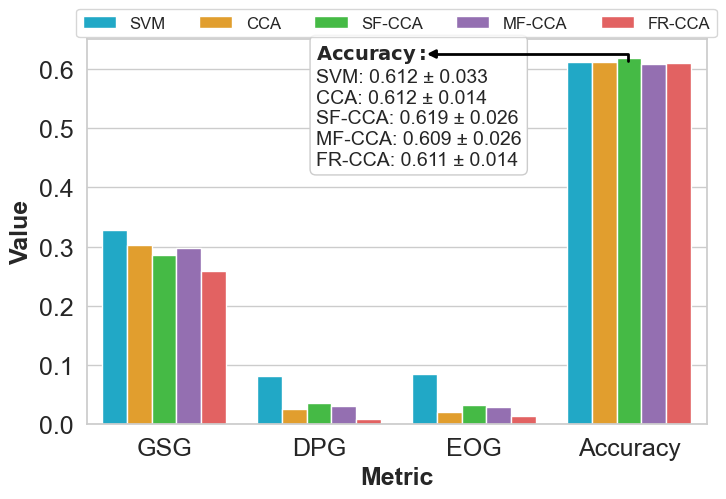

In [72]:
DP_FRCCA_mean = np.mean(all_DP_FR_pr)
DP_trad_mean = np.mean(all_DP_trad_pr)
DP_SFCCA_mean = np.mean(all_DP_SFCCA_pr)
DP_MFCCA_mean = np.mean(all_DP_MFCCA_pr)
DP_svm_mean = np.mean(all_DP_svm_pr)

EO_FRCCA_mean = np.mean(all_EO_FR)
EO_trad_mean = np.mean(all_EO_trad)
EO_SFCCA_mean = np.mean(all_EO_SFCCA)
EO_MFCCA_mean = np.mean(all_EO_MFCCA)
EO_svm_mean = np.mean(all_EO_svm)

accuracy_FR_mean = np.mean(accuracy_FR)
accuracy_trad_mean = np.mean(accuracy_trad)
accuracy_SFCCA_mean = np.mean(accuracy_SFCCA)
accuracy_MFCCA_mean = np.mean(accuracy_MFCCA)
accuracy_svm_mean = np.mean(accuracy_svm)

GS_FR_mean = np.mean(all_GS_FR)
GS_trad_mean = np.mean(all_GS_trad)
GS_SFCCA_mean = np.mean(all_GS_SF)
GS_MFCCA_mean = np.mean(all_GS_MF)
GS_svm_mean = np.mean(all_GS_svm)
data = {
    'Algorithm': ['SVM', 'SVM', 'SVM', 'SVM',
                  'CCA',  'CCA',  'CCA',  'CCA',
                  'SF-CCA','SF-CCA','SF-CCA','SF-CCA',
                  'MF-CCA','MF-CCA','MF-CCA','MF-CCA',
                  'FR-CCA', 'FR-CCA', 'FR-CCA','FR-CCA'
                 
                  
                  
                  ],
    'Metric': ['GSG', 'DPG', 'EOG', 'Accuracy',
               'GSG', 'DPG', 'EOG', 'Accuracy', 
               'GSG', 'DPG', 'EOG', 'Accuracy',
               'GSG', 'DPG', 'EOG', 'Accuracy',
               'GSG', 'DPG', 'EOG', 'Accuracy'
               ],
    'Value': [GS_svm_mean, DP_svm_mean, EO_svm_mean, accuracy_svm_mean,
              GS_trad_mean, DP_trad_mean, EO_trad_mean, accuracy_trad_mean,   
              GS_SFCCA_mean, DP_SFCCA_mean, EO_SFCCA_mean, accuracy_SFCCA_mean,
              GS_MFCCA_mean, DP_MFCCA_mean, EO_MFCCA_mean, accuracy_MFCCA_mean,
              GS_FR_mean, DP_FRCCA_mean, EO_FRCCA_mean, accuracy_FR_mean
              ]
              }
df = pd.DataFrame(data)

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
barplot = sns.barplot(x='Metric', y='Value', hue='Algorithm', data=df,
                      palette=["#05b9e2", "#ffa510", "limegreen", "#9564bc", "#f74d4d"], alpha=1)

accuracy_values_with_std = {
    'SVM': f"{accuracy_svm_mean:.3f} ± {accuracy_svm_std:.3f}",
    'CCA': f"{accuracy_trad_mean:.3f} ± {accuracy_trad_std:.3f}",
    'SF-CCA': f"{accuracy_SFCCA_mean:.3f} ± {accuracy_SFCCA_std:.3f}",
    'MF-CCA': f"{accuracy_MFCCA_mean:.3f} ± {accuracy_MFCCA_std:.3f}",
    'FR-CCA': f"{accuracy_FR_mean:.3f} ± {accuracy_FR_std:.3f}"
}

accuracy_text = "\n".join([f"{key}: {value}" for key, value in accuracy_values_with_std.items()])
accuracy_text = r"$\bf{Accuracy:}$" + "\n" + accuracy_text
plt.text(0.37, 0.99, accuracy_text, fontsize=14, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#cccccc", facecolor="white"))
# for p in barplot.patches:
#     height = p.get_height()
#     barplot.text(p.get_x() + p.get_width() / 2., height, '{:1.3f}'.format(height), 
#             ha="center", va='bottom', fontsize=11)
plt.annotate('', xy=(0.53, 0.89), xytext=(0.785, 0.87),
             xycoords='figure fraction', textcoords='figure fraction',
            arrowprops=dict(arrowstyle='-|>', color='black',
                             connectionstyle='angle,angleA=90,angleB=0,rad=0',
                             lw=2))
#plt.title('Comparison of Algorithms on Different Metrics', fontsize=18)
plt.xlabel('Metric', fontsize=18, fontweight='bold')
plt.ylabel('Value', fontsize=18, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
legend = plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5)

plt.show()

In [80]:
data1 = {
  'acc_svm': accuracy_svm,
  'gs_svm': all_GS_svm,
  'dp_svm': all_DP_svm_pr,
  'eo_svm': all_EO_svm,
  
  'acc_trad': accuracy_trad,
  'gs_trad': all_GS_trad,
  'dp_trad': all_DP_trad_pr,
  'eo_trad': all_EO_trad,
  
  'acc_SFCCA': accuracy_SFCCA,
  'gs_SFCCA': all_GS_SF,
  'dp_SFCCA': all_DP_SFCCA_pr,
  'eo_SFCCA': all_EO_SFCCA,
  
  'acc_MFCCA': accuracy_MFCCA,
  'gs_MFCCA': all_GS_MF,
  'dp_MFCCA': all_DP_MFCCA_pr,
  'eo_MFCCA': all_EO_MFCCA,
  
  'acc_FRCCA': accuracy_FR,
  'gs_FRCCA': all_GS_FR,
  'dp_FRCCA': all_DP_FR_pr,
  'eo_FRCCA': all_EO_FR,
}
df = pd.DataFrame(data1, index=['SVM', 'CCA', 'SFCCA', 'MFCCA', 'FRCCA'])
df.to_csv('MRI.csv')